## MNIST DIGIT CLASSIFICATION:

In [24]:
# General Imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

### Importing Dataset:

In [17]:
# NOTE!!! Run this once during the start of the session to fetch the dataset.
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

scikitlearn datasets have similar keys:
 - "DESCR" : which has description of the dataset.
 - "data"  : which each entry as one row and the features/attributes acrros its columns.
 - "target": which has the labels for the dataset.

#### Exploring the data and sample visualization

In [26]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


The size of the data and the labels. The image is 28X28 pixel gray scale image flattenned to one row. To recover the image it has to be reshaped.

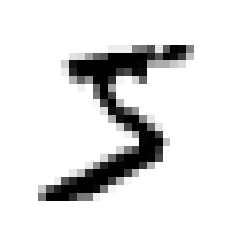

Target label: 5
Target label type: <class 'str'>


In [30]:
sample_digit = X[0]
sample_digit_reshaped = sample_digit.reshape(28,28)

plt.imshow(sample_digit_reshaped, cmap="binary")
plt.axis("off")
plt.show()

print(f"Target label: {y[0]}")
print(f"Target label type: {type(y[0])}")

Target label is of string type and it has to be casted to "int".

In [32]:
# Converting input target label from str -> int
y = y.astype(np.uint8)
print(f"Target label: {y[0]}")
print(f"Target label type: {type(y[0])}")

Target label: 5
Target label type: <class 'numpy.uint8'>


### Splitting data into train and test splits:

In [33]:
# Simple Splitting strategy, TODO: will have to change code to use pipelines and transformers.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Training Models:

#### Simple SGD classifier to predic classification of digit 3:

In [35]:
from sklearn.linear_model import SGDClassifier

# modifying labels to boolean values with value being true if label was 3 in the earlier set.
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

# fitting the classifier.
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_3)

array([False, False, False, False, False, False, False, False, False,
       False])

In [39]:
# predicting for first 10 samples.
predictions = sgd_classifier.predict(X[:12])
print([x for x in zip(y_train_3[:12], predictions)])

[(False, False), (False, False), (False, False), (False, False), (False, False), (False, False), (False, False), (True, False), (False, False), (False, False), (True, True), (False, False)]


#### crossvalidation:

In [43]:
from sklearn.model_selection import cross_val_score
sgd_scores = cross_val_score(sgd_classifier, X_train, y_train_3, scoring="accuracy", cv=3)

In [44]:
print(sgd_scores)

[0.9496  0.9624  0.96275]


In [47]:
from sklearn.base import BaseEstimator

class Never3Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [48]:
never_3_classifier = Never3Classifier()
never_3_scores = cross_val_score(never_3_classifier, X_train, y_train_3, scoring="accuracy", cv=3)

In [49]:
print(never_3_scores)

[0.8962  0.89975 0.8975 ]


This is to demonstrate that accuracy may not be the right performance metric for classifiers, especially when dealing with skewed datasets.